In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('./train-data.csv')
df_test = pd.read_csv('./test-data.csv')

In [14]:
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5477,5477,Land Rover Range Rover HSE Dynamic,Kochi,2018,52827,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.76
1875,1875,Toyota Innova 2.5 LE 2014 Diesel 7 Seater,Pune,2014,102418,Diesel,Manual,First,12.99 kmpl,2494 CC,100.6 bhp,7.0,NaN,10.10
156,156,Volkswagen Polo Diesel Trendline 1.2L,Jaipur,2012,65634,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,3.50
5685,5685,Maruti Ritz VDi,Pune,2013,77000,Diesel,Manual,First,23.2 kmpl,1248 CC,73.94 bhp,5.0,NaN,3.65
3086,3086,Chevrolet Enjoy TCDi LS 8 Seater,Coimbatore,2014,74041,Diesel,Manual,First,18.2 kmpl,1248 CC,73.8 bhp,8.0,NaN,3.88


In [15]:
df_test.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
543,543,Hyundai Verna 1.6 EX VTVT,Mumbai,2013,58000,Petrol,Manual,First,17.01 kmpl,1591 CC,121.3 bhp,5.0,NaN
916,916,Maruti SX4 VDI,Jaipur,2011,82000,Diesel,Manual,Second,21.5 kmpl,1248 CC,88.8 bhp,5.0,NaN
819,819,Maruti Alto LXi,Jaipur,2011,90000,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,NaN
388,388,Maruti Swift LXI Option,Kochi,2017,62889,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,5.0,NaN
544,544,Hyundai i20 Magna Optional 1.2,Kolkata,2013,46000,Petrol,Manual,Second,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN


In [16]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df_test.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
# How data looks like? 
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
565,Honda Amaze VX i-DTEC,Kochi,2015,62550,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,5.60
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
704,Audi Q5 2008-2012 2.0 TDI,Kochi,2013,13452,Diesel,Automatic,First,12.8 kmpl,1968 CC,167.6 bhp,5.0,NaN,25.46
1574,Volkswagen Tiguan 2.0 TDI Highline,Jaipur,2017,50510,Diesel,Automatic,First,17.06 kmpl,1968 CC,141 bhp,5.0,36.45 Lakh,24.90
2519,Maruti Swift VDI,Pune,2018,30000,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,NaN,6.00


In [18]:
# How big the dataset is?
df.shape, df_test.shape

((6019, 13), (1234, 12))

Forecast Column - Price

In [19]:
# Datatype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [20]:
# Are there any missing values?
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [21]:
# How does the data looks mathematically? 
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [22]:
# Are there any duplicate values? 
df.duplicated().sum()

0

In [23]:
# How is the correlation between columns
df.corr()['Price']

Year                 0.305327
Kilometers_Driven   -0.011493
Seats                0.052225
Price                1.000000
Name: Price, dtype: float64

Plotting Univariate categorial data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


<AxesSubplot:ylabel='Owner_Type'>

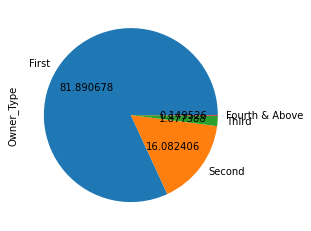

In [40]:
plt.figure(figsize=(20,6))
sns.countplot(df.Fuel_Type)
plt.xticks(rotation=45, ha='right')
plt.show()

<AxesSubplot:ylabel='Transmission'>

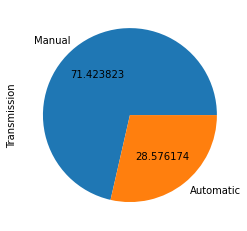

In [42]:
df.Transmission.value_counts().plot(kind='pie', autopct='%2f')

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


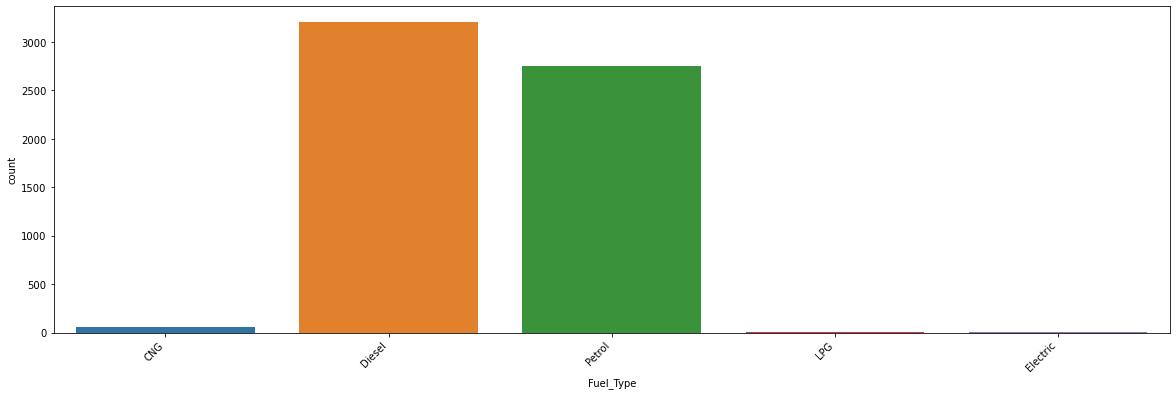

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(df.Fuel_Type)
plt.xticks(rotation=45, ha='right')
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


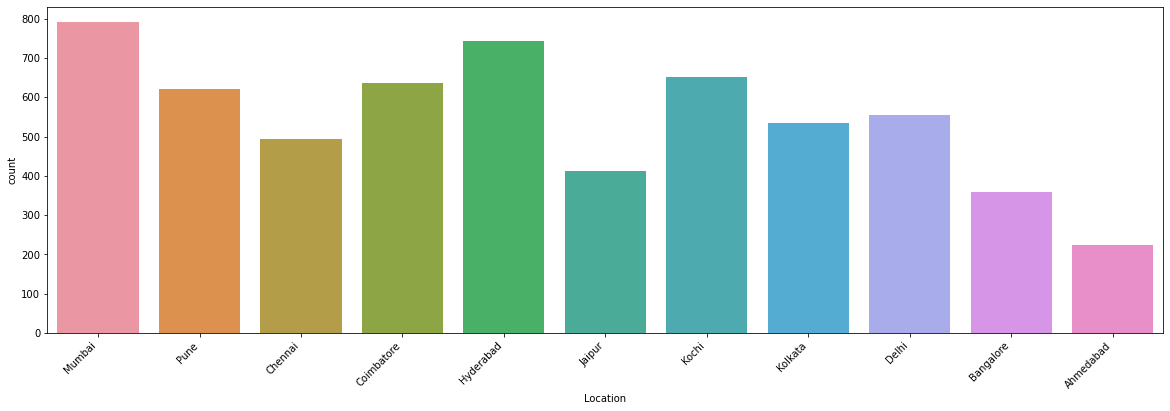

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(df.Location)
plt.xticks(rotation=45, ha='right')
plt.show()

plotting univariate numerical data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


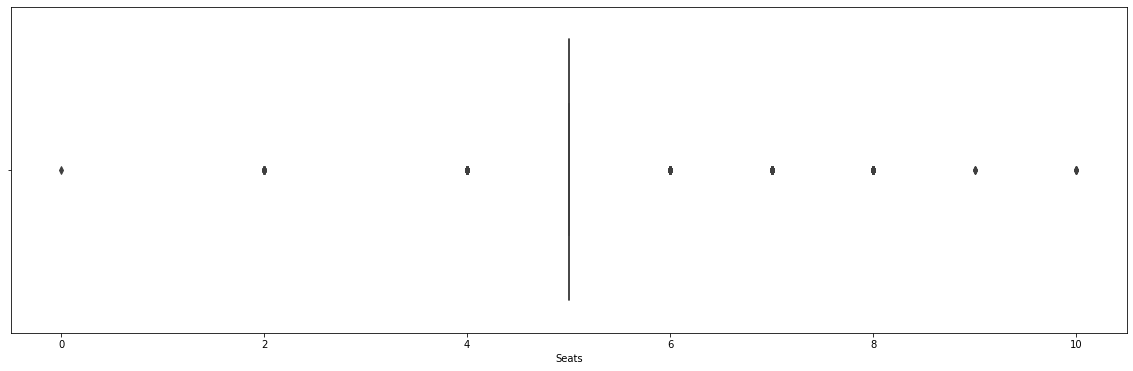

1.8357920536773193


(array([1.000e+00, 0.000e+00, 1.600e+01, 0.000e+00, 9.900e+01, 5.014e+03,
        3.100e+01, 6.740e+02, 1.340e+02, 8.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

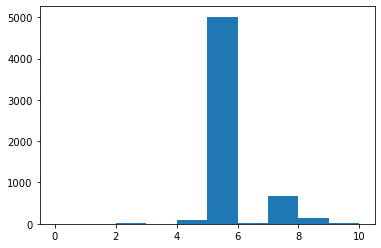

In [56]:
plt.figure(figsize=(20,6))
sns.boxplot(df.Seats)
plt.show()
print(df.Seats.skew())
plt.hist(df.Seats, bins=10)

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


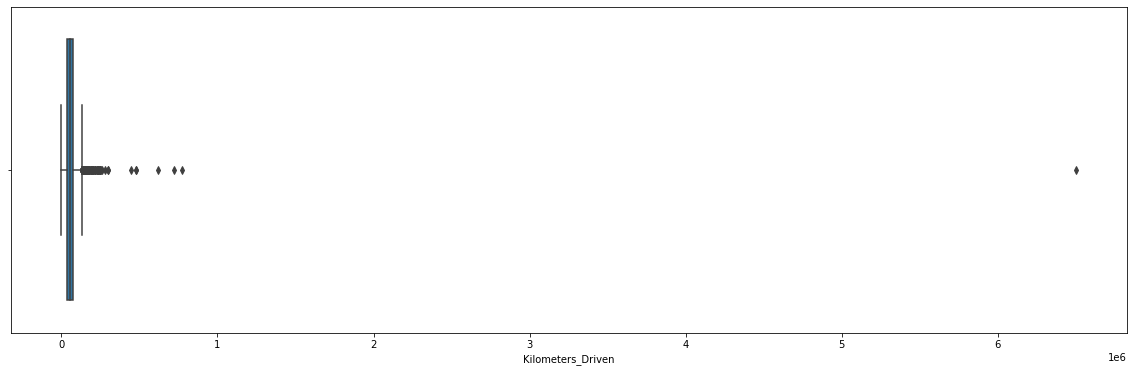

58.72466188582937


(array([5.811e+03, 1.970e+02, 4.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.71000000e+02, 1.30167580e+05, 2.60164160e+05, 3.90160740e+05,
        5.20157320e+05, 6.50153900e+05, 7.80150480e+05, 9.10147060e+05,
        1.04014364e+06, 1.17014022e+06, 1.30013680e+06, 1.43013338e+06,
        1.56012996e+06, 1.69012654e+06, 1.82012312e+06, 1.95011970e+06,
        2.08011628e+06, 2.21011286e+06, 2.34010944e+06, 2.47010602e+06,
        2.600102

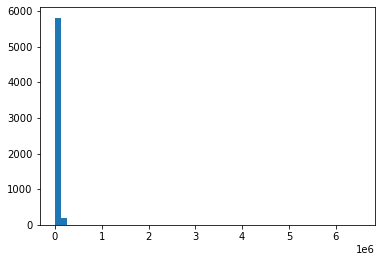

In [58]:
plt.figure(figsize=(20,6))
sns.boxplot(df.Kilometers_Driven)
plt.show()
print(df.Kilometers_Driven.skew())
plt.hist(df.Kilometers_Driven, bins=50)

(array([  4.,   2.,   4.,   0.,   8.,  15.,   0.,  17.,  31.,   0.,  57.,
         78., 125.,   0., 174., 198.,   0., 342., 466.,   0., 580., 649.,
        797.,   0., 744., 741.,   0., 587., 298., 102.]),
 array([1998. , 1998.7, 1999.4, 2000.1, 2000.8, 2001.5, 2002.2, 2002.9,
        2003.6, 2004.3, 2005. , 2005.7, 2006.4, 2007.1, 2007.8, 2008.5,
        2009.2, 2009.9, 2010.6, 2011.3, 2012. , 2012.7, 2013.4, 2014.1,
        2014.8, 2015.5, 2016.2, 2016.9, 2017.6, 2018.3, 2019. ]),
 <BarContainer object of 30 artists>)

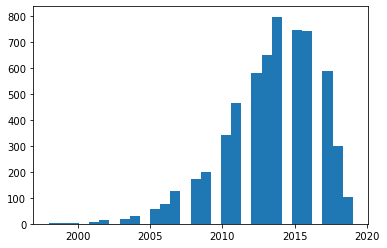

In [48]:
plt.hist(df.Year, bins=30)

Plotting bi-variate/multivariate categorical & Numerical data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


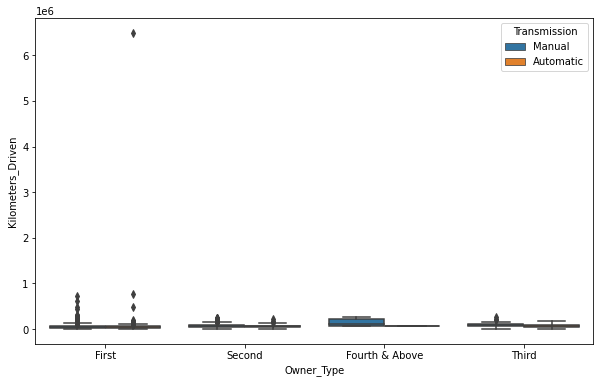

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(df.Owner_Type, df.Kilometers_Driven, hue=df.Transmission)
plt.show()

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Location', ylabel='Price'>

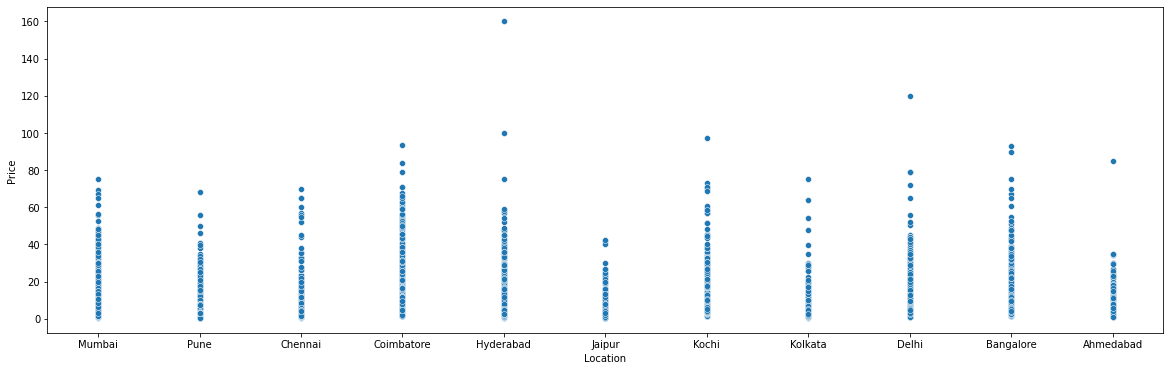

In [72]:
plt.figure(figsize=(20, 6))
sns.scatterplot(df.Location, df.Price)

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

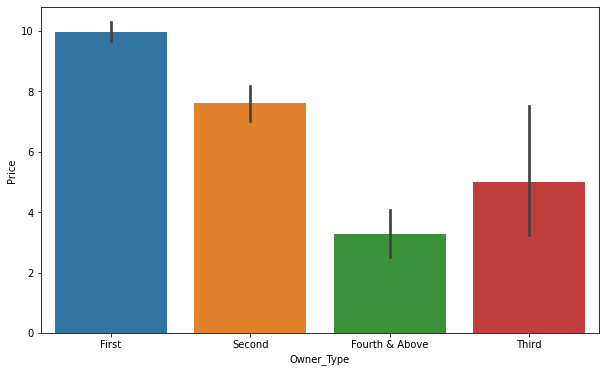

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(df.Owner_Type, df.Price)

/home/gagan/anaconda3/envs/ml_experiments/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

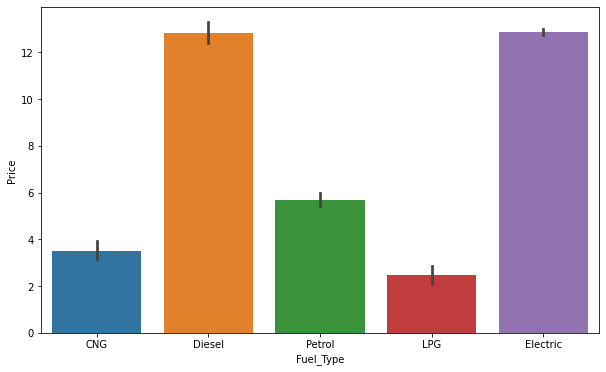

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(df.Fuel_Type, df.Price)